# Construcción del modelo para la red de usuarios

In [6]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dataset = pd.read_csv("datos_limpios/version2.0.csv")
dataset = dataset.values
X = dataset[:,1:79]
Y = dataset[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_test.shape)

x_train shape (519, 78)
x_test shape (223, 78)
y_train shape (519,)
y_test shape (223,)


#### Prueba con CNN

In [13]:
# define model
model = Sequential()
model.add(Dense(80,  activation='relu', input_shape=(78,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
#opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, Y_train, epochs=10, batch_size=1, verbose=0)
# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.86%


In [14]:
#y_pred = model_2.predict_classes(X_test)
y_pred = model.predict_classes(X_test)
cnf_matrix=confusion_matrix(Y_test, y_pred)

/Users/gloriadelvalle/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization
[[101  17]
 [ 19  86]]


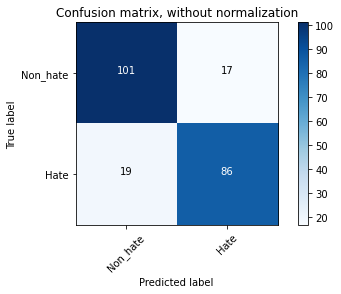

In [15]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Non_hate", "Hate"],
                    title='Confusion matrix, without normalization')
plt.show()

In [17]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred, digits=4))

Accuracy: 0.8385650224215246
              precision    recall  f1-score   support

         0.0     0.8417    0.8559    0.8487       118
         1.0     0.8350    0.8190    0.8269       105

    accuracy                         0.8386       223
   macro avg     0.8383    0.8375    0.8378       223
weighted avg     0.8385    0.8386    0.8385       223



#### Prueba con Naive Bayes

In [18]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,Y_train)

#Predict Output
y_pred= model.predict(X_test) # 0:Overcast, 2:Mild
print ("Predicted Value:", y_pred)
cnf_matrix = confusion_matrix(Y_test, y_pred)

Predicted Value: [1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 1.]


Confusion matrix, without normalization
[[ 91  27]
 [  5 100]]


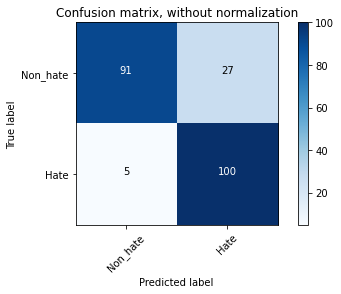

In [19]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Non_hate", "Hate"],
                    title='Confusion matrix, without normalization')
plt.show()

In [22]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred, digits=4))

Accuracy: 0.8565022421524664
              precision    recall  f1-score   support

         0.0     0.9479    0.7712    0.8505       118
         1.0     0.7874    0.9524    0.8621       105

    accuracy                         0.8565       223
   macro avg     0.8677    0.8618    0.8563       223
weighted avg     0.8723    0.8565    0.8559       223



#### Prueba con Logistic Regression

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/Users/gloriadelvalle/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [26]:
print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.8444    0.9661    0.9012       118
         1.0     0.9545    0.8000    0.8705       105

    accuracy                         0.8879       223
   macro avg     0.8995    0.8831    0.8858       223
weighted avg     0.8963    0.8879    0.8867       223



#### Prueba con KNN

In [27]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred, digits=4))

[[91 27]
 [45 60]]
              precision    recall  f1-score   support

         0.0     0.6691    0.7712    0.7165       118
         1.0     0.6897    0.5714    0.6250       105

    accuracy                         0.6771       223
   macro avg     0.6794    0.6713    0.6708       223
weighted avg     0.6788    0.6771    0.6734       223



In [54]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6771300448430493


#### Prueba con SVM

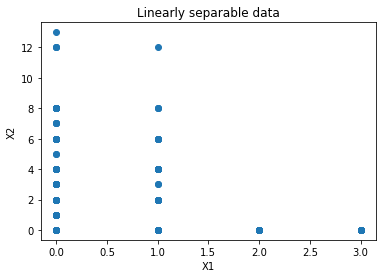

In [30]:
# Generate scatter plot for training data 
plt.scatter(X_train[:,0:2], X_train[:,3:5])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Confusion matrix, without normalization
[[110   8]
 [ 20  85]]


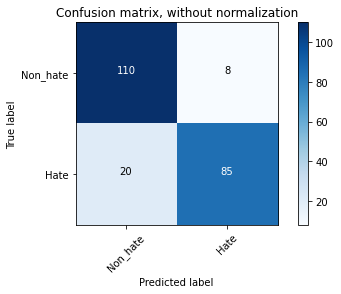

              precision    recall  f1-score   support

         0.0     0.8462    0.9322    0.8871       118
         1.0     0.9140    0.8095    0.8586       105

    accuracy                         0.8744       223
   macro avg     0.8801    0.8709    0.8728       223
weighted avg     0.8781    0.8744    0.8737       223



In [31]:
clf = svm.SVC(kernel='linear')
clf = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
cnf_matrix=confusion_matrix(Y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Non_hate", "Hate"],
                    title='Confusion matrix, without normalization')
plt.show()
print(classification_report(Y_test, y_pred, digits=4))

In [32]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.874439461883408


#### Prueba con DecisionTree

In [33]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9955156950672646


Confusion matrix, without normalization
[[118   0]
 [  1 104]]


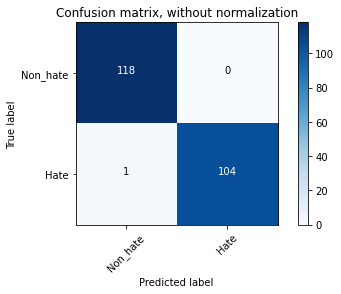

              precision    recall  f1-score   support

         0.0     0.9916    1.0000    0.9958       118
         1.0     1.0000    0.9905    0.9952       105

    accuracy                         0.9955       223
   macro avg     0.9958    0.9952    0.9955       223
weighted avg     0.9956    0.9955    0.9955       223



In [35]:
cnf_matrix=confusion_matrix(Y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Non_hate", "Hate"],
                    title='Confusion matrix, without normalization')
plt.show()
print(classification_report(Y_test, y_pred, digits=4))

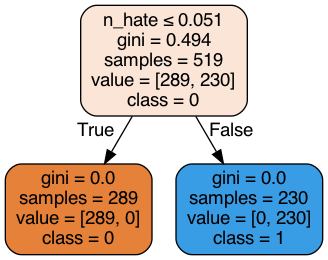

In [89]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
dataset = pd.read_csv("datos_limpios/version2.0.csv")
feature_cols = dataset.columns[1:79].tolist()
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('odio.png')
Image(graph.create_png())

In [108]:
import joblib
joblib.dump(model, "datos_limpios/modelito")
model = joblib.load("datos_limpios/modelito")
result_val = model.score(X_train, Y_train)
result_test = model.score(X_test, Y_test)

In [110]:
result_test

0.9955156950672646

In [40]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
kfold = model_selection.KFold(n_splits=10)#, random_state=seed
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=2018)
results = model_selection.cross_val_score(model, X_train, Y_train,cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+str(results[i]))

Model: 0 Accuracy is: 1.0
Model: 1 Accuracy is: 1.0
Model: 2 Accuracy is: 1.0
Model: 3 Accuracy is: 1.0
Model: 4 Accuracy is: 1.0
Model: 5 Accuracy is: 1.0
Model: 6 Accuracy is: 1.0
Model: 7 Accuracy is: 1.0
Model: 8 Accuracy is: 1.0
Model: 9 Accuracy is: 1.0


In [41]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=cart, n_estimators=num_trees, learning_rate = 0.1)
model.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=100)

In [42]:
pred_label = model.predict(X_test)
nnz = np.float(np.shape(Y_test)[0] - np.count_nonzero(pred_label - Y_test))
acc = 100*nnz/np.shape(Y_test)[0]

<ipython-input-42-b86a4764e178>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nnz = np.float(np.shape(Y_test)[0] - np.count_nonzero(pred_label - Y_test))


In [43]:
print('accuracy is: '+str(acc))
print(classification_report(Y_test, pred_label, digits=4))

accuracy is: 99.55156950672645
              precision    recall  f1-score   support

         0.0     0.9916    1.0000    0.9958       118
         1.0     1.0000    0.9905    0.9952       105

    accuracy                         0.9955       223
   macro avg     0.9958    0.9952    0.9955       223
weighted avg     0.9956    0.9955    0.9955       223



In [36]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [38]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred, digits=4))
print(metrics.accuracy_score(Y_test, y_pred))

[[118   0]
 [  1 104]]
              precision    recall  f1-score   support

         0.0     0.9916    1.0000    0.9958       118
         1.0     1.0000    0.9905    0.9952       105

    accuracy                         0.9955       223
   macro avg     0.9958    0.9952    0.9955       223
weighted avg     0.9956    0.9955    0.9955       223

0.9955156950672646


#### Prueba con Perceptrón y MLP

In [44]:
# we import the necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load and partition MNIST dataset
#X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X
y = Y
# you can check how if we change random_state (seed for test/train split)
# the accuracy of our models also change!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=2)

# first let's use a very simple linear perceptron: we set the hyperparams and train
# a perceptron does not use activation units which means it's a completely linear model
per = Perceptron(random_state=1, max_iter=30, tol=0.001)
per.fit(X_train, y_train)

# we predict with our built perceptron
yhat_train_per = per.predict(X_train)
yhat_test_per = per.predict(X_test)

print(f"Perceptron: Accuracy in train is %.2f" % (accuracy_score(y_train, yhat_train_per)))
print(f"Perceptron: Accuracy in test is %.2f" % (accuracy_score(y_test, yhat_test_per)))

# now let's try a multilayer perceptron
# the default activation function is ReLU
mlp = MLPClassifier(max_iter=150, alpha=1e-4, solver='adam', random_state=2,
                    learning_rate_init=.01, hidden_layer_sizes=(1000, 500, 2))
mlp.fit(X_train, y_train)

# predict with our new classifier
yhat_train_mlp = mlp.predict(X_train)
yhat_test_mlp = mlp.predict(X_test)

print(f"Multilayer Perceptron: Accuracy in train is %.2f" % (accuracy_score(y_train, yhat_train_mlp)))
print(f"Multilayer Perceptron: Accuracy in test is %.2f" % (accuracy_score(y_test, yhat_test_mlp)))

Perceptron: Accuracy in train is 0.79
Perceptron: Accuracy in test is 0.84
Multilayer Perceptron: Accuracy in train is 0.95
Multilayer Perceptron: Accuracy in test is 0.83


In [45]:
print(classification_report(y_test,yhat_test_mlp, digits=4))

              precision    recall  f1-score   support

         0.0     0.8045    0.9068    0.8526       118
         1.0     0.8778    0.7524    0.8103       105

    accuracy                         0.8341       223
   macro avg     0.8411    0.8296    0.8314       223
weighted avg     0.8390    0.8341    0.8327       223



Confusion matrix, without normalization
[[107  11]
 [ 26  79]]


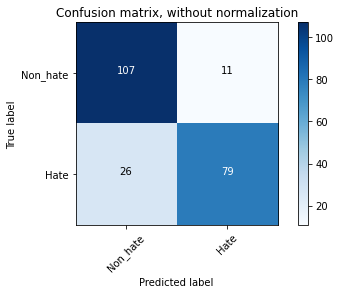

In [159]:
cnf_matrix=confusion_matrix(y_test, yhat_test_mlp)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Non_hate", "Hate"],
                    title='Confusion matrix, without normalization')
plt.show()